# CREDIT CARD FRAUD DETECTION 

In [71]:
# import depedencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Read Data 

In [4]:
# Load the data set
df= pd.read_csv("creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Describe and clean the data set

In [6]:
df["Class"].unique()

array([0, 1], dtype=int64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.shape

(284807, 31)

In [12]:
# unbalanced Dataset
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<AxesSubplot:xlabel='Class'>

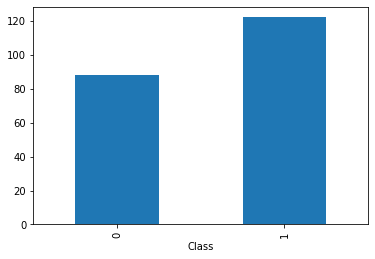

In [21]:
df.groupby("Class")["Amount"].mean().plot(kind="bar")

In [23]:
df.groupby("Class")["Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [26]:
#Create new balanced dataset from pervoius one
normal=df[df["Class"]==0]
fraud=df[df["Class"]==1]

In [28]:
normal.Class.unique()

array([0], dtype=int64)

In [29]:
fraud.Class.unique()

array([1], dtype=int64)

In [31]:
noraml_sample=normal.sample(n=492)

In [37]:
new_dataSet=pd.concat([noraml_sample,fraud],axis=0)

In [38]:
new_dataSet.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202846,134517.0,1.898658,-0.252749,-0.402876,1.404554,-0.252192,0.209022,-0.390527,0.188173,1.025177,...,-0.492930,-1.180675,0.395900,-0.495662,-0.340687,-1.097673,0.049387,-0.044873,10.99,0
13745,24379.0,1.165753,1.381063,-1.433264,1.675830,1.237557,-0.966822,0.564179,-0.232935,0.437739,...,-0.271412,-0.390761,-0.190627,-0.343245,0.762489,-0.323461,0.031836,0.078866,0.89,0
175000,122161.0,-0.785342,0.249901,0.088685,-0.460490,0.830368,-1.258562,0.923645,-0.310274,0.115709,...,-0.332889,-0.502717,0.624181,-0.113378,-0.326792,0.152614,0.114190,0.028106,8.99,0
237849,149422.0,1.991193,0.401290,-1.429176,1.455451,0.173529,-1.918454,0.852514,-0.583319,-0.247554,...,0.190459,0.669864,0.095862,0.877715,0.346455,-0.537244,-0.027076,-0.053725,8.99,0
55226,46841.0,-2.463152,-2.659129,2.751280,-1.012937,0.524065,-0.660241,-1.765074,0.628339,-0.175868,...,0.447711,0.690744,0.258910,0.035673,0.663363,-0.138991,0.213127,0.168163,126.80,0


In [47]:
# split the data
Features= new_dataSet.iloc[0:,0:30]
Target=new_dataSet["Class"]

In [57]:
Features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
202846,134517.0,1.898658,-0.252749,-0.402876,1.404554,-0.252192,0.209022,-0.390527,0.188173,1.025177,...,-0.308877,-0.492930,-1.180675,0.395900,-0.495662,-0.340687,-1.097673,0.049387,-0.044873,10.99
13745,24379.0,1.165753,1.381063,-1.433264,1.675830,1.237557,-0.966822,0.564179,-0.232935,0.437739,...,-0.042634,-0.271412,-0.390761,-0.190627,-0.343245,0.762489,-0.323461,0.031836,0.078866,0.89
175000,122161.0,-0.785342,0.249901,0.088685,-0.460490,0.830368,-1.258562,0.923645,-0.310274,0.115709,...,-0.294043,-0.332889,-0.502717,0.624181,-0.113378,-0.326792,0.152614,0.114190,0.028106,8.99
237849,149422.0,1.991193,0.401290,-1.429176,1.455451,0.173529,-1.918454,0.852514,-0.583319,-0.247554,...,-0.298707,0.190459,0.669864,0.095862,0.877715,0.346455,-0.537244,-0.027076,-0.053725,8.99
55226,46841.0,-2.463152,-2.659129,2.751280,-1.012937,0.524065,-0.660241,-1.765074,0.628339,-0.175868,...,1.028933,0.447711,0.690744,0.258910,0.035673,0.663363,-0.138991,0.213127,0.168163,126.80


In [58]:
Target.head()

202846    0
13745     0
175000    0
237849    0
55226     0
Name: Class, dtype: int64

## Split the new dataset to train and test

In [61]:
x_train,x_test,y_train,y_test= train_test_split(Features,Target,test_size=0.3,stratify=Target,random_state=42)

## Model

In [62]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [64]:
predict=model.predict(x_test)

In [65]:
data_accuracy= accuracy_score(predict,y_test)

In [66]:
print(data_accuracy)

0.9256756756756757


In [68]:
results = confusion_matrix(predict, y_test)

In [69]:
print(results)

[[142  16]
 [  6 132]]


## Classification Report

In [73]:
print ('Accuracy Score is',accuracy_score(y_test, predict))
print ('Classification Report : ')
print (classification_report(y_test, predict))

Accuracy Score is 0.9256756756756757
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       148
           1       0.96      0.89      0.92       148

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

